In [1]:
# Gina McFarland
# DST2 Final Project
# Autumn 2021

### Research Question:

#### Which supervised learning algorithm most accurately classifies Republicans and Democrats based on voting records? This is important because it is useful to see how people group themselves based on ideas. Additionally, it is useful to see what types of ideas people avoid due to conflicts of interest or reluctance to make a position known. This is shown by the ‘?’.
- Models that will be used: Logistic Regression, Neural Network Classification, Random Forest Classification, Support Vector Classification, and Xgboost Classification.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, \
  accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from prettytable import PrettyTable

Data Description:
     Title: 1984 United States Congressional Voting Records Database

2. Source Information:
    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                 Washington, D.C., 1985.
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987 

-   1. Class Name: 2 (democrat, republican)
-   2. handicapped-infants: 2 (y,n)
-   3. water-project-cost-sharing: 2 (y,n)
-   4. adoption-of-the-budget-resolution: 2 (y,n)
-   5. physician-fee-freeze: 2 (y,n)
-   6. el-salvador-aid: 2 (y,n)
-   7. religious-groups-in-schools: 2 (y,n)
-   8. anti-satellite-test-ban: 2 (y,n)
-   9. aid-to-nicaraguan-contras: 2 (y,n)
-  10. mx-missile: 2 (y,n)
-  11. immigration: 2 (y,n)
-  12. synfuels-corporation-cutback: 2 (y,n)
-  13. education-spending: 2 (y,n)
-  14. superfund-right-to-sue: 2 (y,n)
-  15. crime: 2 (y,n)
-  16. duty-free-exports: 2 (y,n)
-  17. export-administration-act-south-africa

In [3]:
column_names = ['class_name', 'handicapped_infants', 'water_sharing','budget_resolution',\
                'physician_fee', 'el_salvador_aid','religious_schools','anti_sat_test', \
                'aid_nicaraguan', 'mx_missile', 'immigration','synfuels_cutback', 'ed_spending',
                'superfund_sue', 'crime', 'duty_free_ex', 'south_africa']

In [4]:
dir = 'C:\\Users\\Gina\\Documents\\University of Denver\\4448 (DS Tools 2)\\Project\\'
congress_df = pd.read_csv(dir+'house-votes-84.data', header=None, names = column_names)

In [5]:
congress_df.head()

,class_name,handicapped_infants,water_sharing,budget_resolution,physician_fee,el_salvador_aid,religious_schools,anti_sat_test,aid_nicaraguan,mx_missile,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free_ex,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### Data Preprocessing

In [6]:
# change values: n = 0, y = 1, ? = u
def map_columns(s): # update democrat, republican to 0,1 later for clarity in next steps
    return s.map({'n':0,'y': 1,'?': np.nan, 'republican':'republican', 'democrat':'democrat'})

In [7]:
congress_df = congress_df.apply(map_columns) # map values across all columns

In [8]:
congress_df.head()

,class_name,handicapped_infants,water_sharing,budget_resolution,physician_fee,el_salvador_aid,religious_schools,anti_sat_test,aid_nicaraguan,mx_missile,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free_ex,south_africa
0,republican,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
2,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1


In [9]:
# move target, class_name to end of dataframe

In [10]:
name_list = congress_df.columns.tolist()

In [11]:
name_list.pop(0)

'class_name'

In [12]:
name_list.append('class_name')

In [13]:
congress_df = congress_df[name_list]

In [14]:
congress_df.head()

,handicapped_infants,water_sharing,budget_resolution,physician_fee,el_salvador_aid,religious_schools,anti_sat_test,aid_nicaraguan,mx_missile,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free_ex,south_africa,class_name
0,0,1,0,1,1,1,0,0,0,1,NaN,1,1,1,0,1,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN,republican
2,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0,democrat
3,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1,democrat
4,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1,democrat


In [15]:
# Check data distribution prior to imputing missing values

In [16]:
# congress_df.hist(figsize=(16,18));

### Handle missing values in dataset
From documentation:
Missing Attribute Values: Denoted by "?"

   NOTE: It is important to recognize that "?" in this database does 
         not mean that the value of the attribute is unknown.  It 
         means simply, that the value is not "yea" or "nay" (see 
         "Relevant Information" section above).

  Documentation States:  #Missing Values:
           1:  0
           2:  0
           3:  12
           4:  48
           5:  11
           6:  11
           7:  15
           8:  11
           9:  14
          10:  15
          11:  22
          12:  7
          13:  21
          14:  31
          15:  25
          16:  17
          17:  28

In [17]:
len(congress_df.columns)

17

In [18]:
congress_df.isnull().sum()

handicapped_infants     12
water_sharing           48
budget_resolution       11
physician_fee           11
el_salvador_aid         15
religious_schools       11
anti_sat_test           14
aid_nicaraguan          15
mx_missile              22
immigration              7
synfuels_cutback        21
ed_spending             31
superfund_sue           25
crime                   17
duty_free_ex            28
south_africa           104
class_name               0
dtype: int64

This confirms the NaNs in the South Africa column that are not in the documentation. The values indicate 269 yes's and 62 no's. There are 435 votes total, and 104 are unaccounted for.

Null values do not exactly match documentation. They are shifted over by 1. I initially thought that the first column was referring to the index, but that does not appear to be the case. Also, the final value, South Africa (export-administration-act-south-africa) with 104 missing values is not shown in the documentation.

There are too many missing values in the South Africa column. We will drop this data.

In [19]:
congress_df = congress_df.drop(['south_africa'], axis=1)

Since some of the votes are missing due to members abstaining from controversial votes it is likely that the data is Not Missing at Random. (NMAR)  
Missing Value Strategy: Each column will be grouped by Republicans and Democrats. The missing values will be filled in after considering the target variable (whether Republican or Democrat) and going with the majority vote from those groups.

Number of Democrats and Republicans in the House of Representatives in 1984

In [20]:
num_reps = congress_df.class_name.value_counts()
num_reps

democrat      267
republican    168
Name: class_name, dtype: int64

In [21]:
iter_list = name_list[:-2] # all column names except south_africa (dropped) and class_name (target, no nulls)

We will get the proportion of party members that missed each vote

In [22]:
null_list = []
for col_name in iter_list:
    null_dict = {}
    nulls = congress_df[congress_df[col_name].isnull()]['class_name'].value_counts()
    null_dict['dems'] = (nulls[0]/num_reps[0]) # get percentage
    null_dict['reps'] = (nulls[1]/num_reps[1])
    null_list.append(null_dict)

In [23]:
null_df = pd.DataFrame(null_list)

In [24]:
null_df

,dems,reps
0,0.033708,0.017857
1,0.104869,0.119048
2,0.026217,0.023810
3,0.029963,0.017857
4,0.044944,0.017857
5,0.033708,0.011905
6,0.029963,0.035714
7,0.041199,0.023810
8,0.071161,0.017857
9,0.014981,0.017857


The values are close. Are they statistically different? This will be tested with at t-test.

In [25]:
A=null_df[['dems']].values.tolist()
B=null_df[['reps']].values.tolist()

In [26]:
t_check=stats.ttest_ind(A,B)
print(t_check)
alpha=0.05 # set confidence level
if(t_check[1]<alpha):
    print('The percentage of missing members from each party is statistically different for the votes.')
else:
    print('The percentage of missing members by vote is not statistically different.')

Ttest_indResult(statistic=array([0.60975268]), pvalue=array([0.54694252]))
The percentage of missing members by vote is not statistically different.


Data is MAR, or Missing at Random. The data is not missing across all observations but only within sub-samples of the data. Based on this, it is reasonable to fill the missing data with that member's party majority vote. 

In [27]:
global grouped_table 
grouped_table = congress_df.groupby('class_name').agg({'handicapped_infants':'sum', \
                                      'water_sharing':'sum', \
                                       'budget_resolution':'sum', \
                                       'physician_fee':'sum', \
                                       'el_salvador_aid':'sum', \
                                       'religious_schools':'sum', \
                                       'anti_sat_test':'sum', \
                                       'aid_nicaraguan':'sum', \
                                       'mx_missile':'sum', \
                                       'immigration':'sum',\
                                       'synfuels_cutback':'sum', \
                                       'ed_spending':'sum', \
                                       'superfund_sue':'sum', \
                                       'crime':'sum', \
                                       'duty_free_ex':'sum'})

This table shows the vote count by part for each vote. These values will be used during data imputation to see how the majority of the missing member's party voted.

In [28]:
grouped_table

,handicapped_infants,water_sharing,budget_resolution,physician_fee,el_salvador_aid,religious_schools,anti_sat_test,aid_nicaraguan,mx_missile,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free_ex
class_name,,,,,,,,,,,,,,,
democrat,156,120,231,14,55,123,200,218,188,124,129,36,73,90,160
republican,31,75,22,163,157,149,39,24,19,92,21,135,136,158,14


Most votes are highly skewed towards Democrat or Republican. The numbers indicate 'yes' votes. 

In [29]:
def impute_vote(df):
    col_name = df.index[1]
    if (np.isnan(df[col_name])): # is nan; need to impute
        if df['class_name'] == 'democrat':
            return (grouped_table[col_name][0]>grouped_table[col_name][1]).astype(int) # Democrats yes > Republican yes
        if df['class_name'] == 'republican':
            return (grouped_table[col_name][1]>grouped_table[col_name][0]).astype(int) # Rep yes > Dem yes
    else:
        return df[col_name] # already had val

In [30]:
for col_name in iter_list: # replace NaNs for each column
    congress_df[col_name] = congress_df[['class_name',col_name]].apply(impute_vote, axis=1)

In [31]:
congress_df.head()

,handicapped_infants,water_sharing,budget_resolution,physician_fee,el_salvador_aid,religious_schools,anti_sat_test,aid_nicaraguan,mx_missile,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free_ex,class_name
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,republican
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,republican
2,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,democrat
3,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,democrat
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,democrat


In [32]:
# spot check to ensure correct imputataion: el_salvador_aid[3] null; democrat; based on votes, should be 0
congress_df.el_salvador_aid.iloc[3] # checks out

0

In [33]:
# spot check to ensure correct imputataion: synfuels_cutback[0] null; republican; based on votes, should be 0
congress_df.synfuels_cutback.iloc[0] # checks out

0

In [34]:
congress_df.isnull().sum()

handicapped_infants    0
water_sharing          0
budget_resolution      0
physician_fee          0
el_salvador_aid        0
religious_schools      0
anti_sat_test          0
aid_nicaraguan         0
mx_missile             0
immigration            0
synfuels_cutback       0
ed_spending            0
superfund_sue          0
crime                  0
duty_free_ex           0
class_name             0
dtype: int64

No more null values in dataset; dropped South Africa column because nearly 25% were null. Otherwise, nulls were imputed based on majority vote on issue from member's party.

### Exploratory Data Analysis

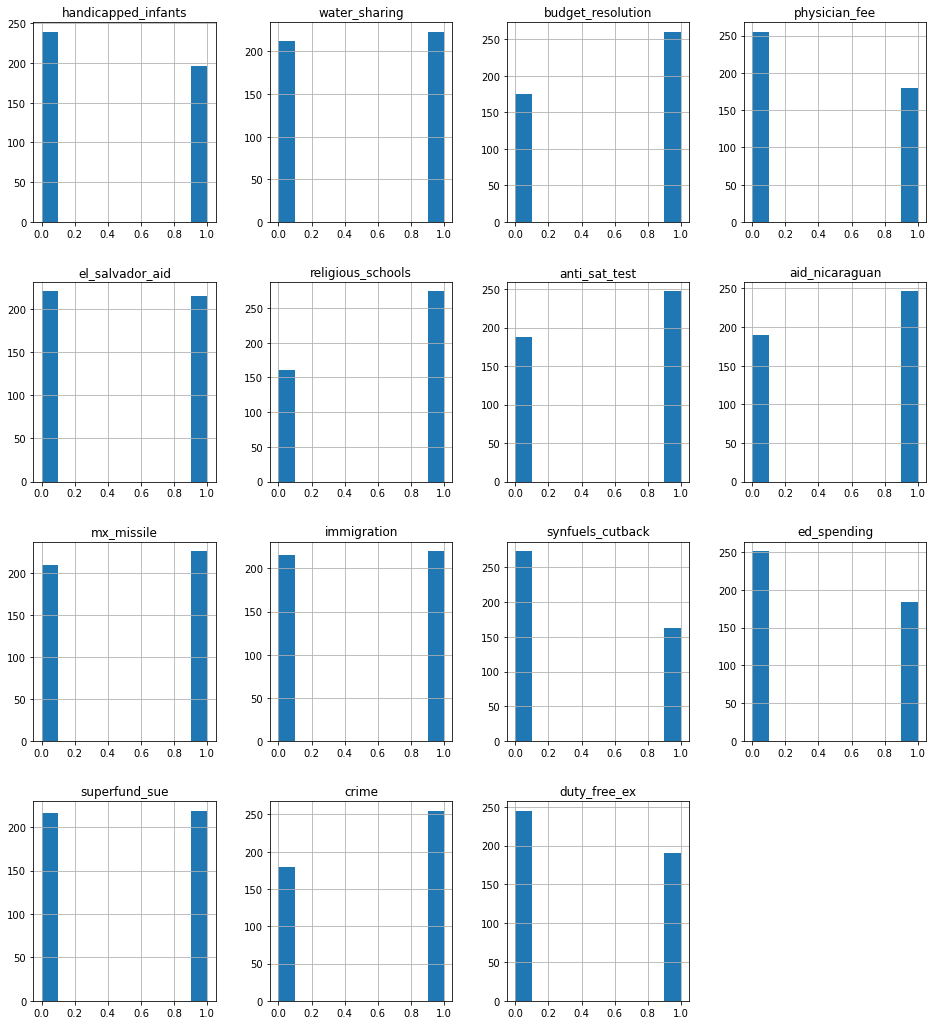

In [35]:
congress_df.hist(figsize=(16,18));

Some votes are clearly lopsided in terms of which party supports the bill, but there are also several that are nearly equal in votes.

In [36]:
congress_df.describe()

,handicapped_infants,water_sharing,budget_resolution,physician_fee,el_salvador_aid,religious_schools,anti_sat_test,aid_nicaraguan,mx_missile,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free_ex
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.450575,0.512644,0.597701,0.413793,0.494253,0.629885,0.567816,0.565517,0.519540,0.505747,0.372414,0.422989,0.503448,0.586207,0.436782
std,0.498124,0.500416,0.490926,0.493079,0.500543,0.483391,0.495950,0.496260,0.500193,0.500543,0.484004,0.494602,0.500564,0.493079,0.496558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data is all standardized by 0 or 1 and the mean and standard deviation vary little. The models should be able to predict well on this consistent data.

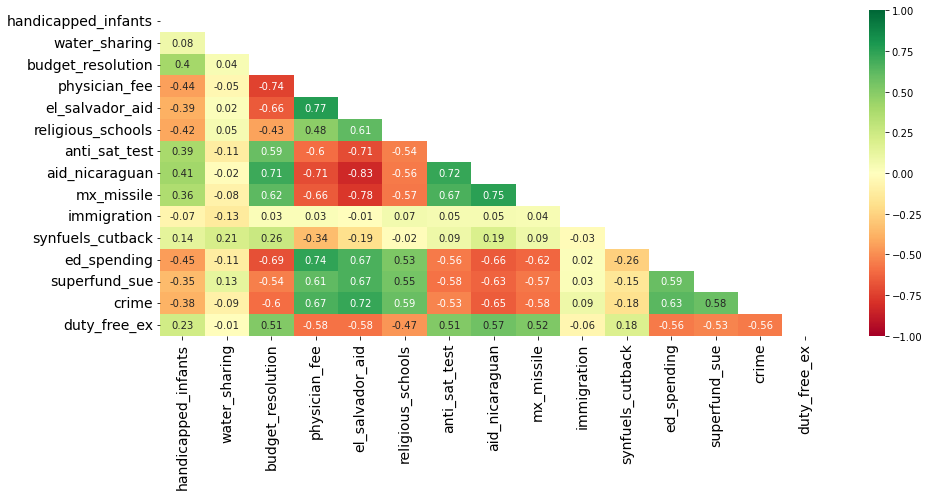

In [37]:
corr = congress_df.corr()

fig, ax = plt.subplots(figsize=(14,7))

mask = np.zeros_like(corr, dtype=bool)   # returns an array of False values with same shape as corr dataframe
mask[np.triu_indices_from(mask)] = True  # creates a boolean mask by making half the zero values == True
ax = sns.heatmap(corr.round(2), mask=mask, ax=ax, annot=True, annot_kws={'fontsize':10}, cmap="RdYlGn",vmin=-1,vmax=1)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.tight_layout()
plt.show()


Some unexpected trends are present; surprisingly, aid to Nicaragua is highly negatively correlated with aid to El Salvador. The budget resolution and physician fee are negatively correlated while education spending and physician fee (physician-fee-freeze) are positively correlated.

### Compare Machine Learning Models

Since all inputs are 0's and 1's, there is no need to scale this dataset. Scaling is meant to ensure that no feature dominates the others; all features already on the same scale.

Note: Democrat = 0; Republican = 1

In [38]:
# change values; had left 'republican' and 'democrat' for clarity in missing data imputation
def map_columns2(s): # update democrat, republican to 0,1 later for clarity in next steps
    return s.map({'democrat':0, 'republican':1})

In [39]:
congress_df['class_name'] = congress_df[['class_name']].apply(map_columns2) # map values across class_name

In [40]:
# view distibution of target variable

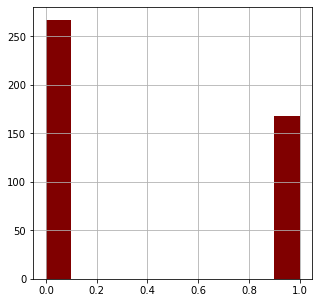

In [41]:
congress_df['class_name'].hist(color='maroon',figsize=(5,5));

Visualization of target; 267 Democrats, 167 Republicans

In [42]:
congress_df.head()

,handicapped_infants,water_sharing,budget_resolution,physician_fee,el_salvador_aid,religious_schools,anti_sat_test,aid_nicaraguan,mx_missile,immigration,synfuels_cutback,ed_spending,superfund_sue,crime,duty_free_ex,class_name
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0


In [43]:
# set up feature and target inputs
X = congress_df.iloc[:,:-1]
y = congress_df.iloc[:,-1]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

#### Random Forest Classification

In [45]:
clf_rf = RandomForestClassifier(max_depth=4, random_state=42)

In [46]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [47]:
# check training accuracy to test for overfitting

In [48]:
y_training_pred = clf_rf.predict(X_train)

In [49]:
accuracy_score(y_train, y_training_pred)

0.9754601226993865

In [50]:
y_pred_rf = clf_rf.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred_rf)

0.9541284403669725

Both training and test performed well; no evidence of overfitting

In [52]:
confusion_matrix(y_test, y_pred_rf)

array([[66,  3],
       [ 2, 38]], dtype=int64)

In [53]:
# tune hyperparameters

In [54]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [55]:
parameters = {'max_depth':[1,2,3,4,5,6], 'n_estimators':[10,50,100,150,200]}

In [56]:
grid = GridSearchCV(estimator=clf_rf,param_grid=parameters,cv=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=4, random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [57]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [58]:
# run again with tuned hyperparameters

In [59]:
clf_tuned = RandomForestClassifier(max_depth=3, n_estimators = 50, random_state=42)

In [60]:
clf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

In [61]:
y_tuned_rf = clf_tuned.predict(X_test)

In [62]:
random_forest_results = {}
random_forest_results['name']='Random Forest Classification'

In [63]:
rf_acc = accuracy_score(y_test, y_tuned_rf)
random_forest_results['accuracy']=rf_acc
rf_acc

0.9541284403669725

In [64]:
rf_pre = precision_score(y_test, y_tuned_rf)
random_forest_results['precision']=rf_pre
rf_pre

0.926829268292683

In [65]:
rf_recall = recall_score(y_test, y_tuned_rf)
random_forest_results['recall']=rf_recall
rf_recall

0.95

In [66]:
rf_f1 = f1_score(y_test, y_tuned_rf)
random_forest_results['f1_score']=rf_f1
rf_f1

0.9382716049382716

In [67]:
rf_cm = confusion_matrix(y_test, y_tuned_rf)
rf_cm

array([[66,  3],
       [ 2, 38]], dtype=int64)

#### Random Forest Conclusion

Tuning the hyperparameters did not increase the accuracy. RandomForest Classifier performed well with an overall accuracy of 95.4% and only 5 misclassified out of 109 samples.

#### Logisitic Regression

In [68]:
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [69]:
y_pred_lr = clf_lr.predict(X_test)

In [70]:
# check training predictions for overfitting 

In [71]:
y_training_pred = clf_lr.predict(X_train)

In [72]:
accuracy_score(y_train, y_training_pred)

0.9754601226993865

In [73]:
accuracy_score(y_test, y_pred_lr)

0.9724770642201835

Very similiar accuracy for train / test; no evidence of overfitting

In [74]:
confusion_matrix(y_test, y_pred_lr)

array([[68,  1],
       [ 2, 38]], dtype=int64)

In [75]:
# tune logistic regression hyperparameters

In [76]:
clf_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [77]:
parameters = {'penalty':('none','l1','l2','elasticnet'), 'solver':('lbfgs','sag','saga','newton-cg'),'max_iter':[10000]}

'max_iter' increased because some models were failing. All combinations that were possible (i.e. some expected errors due to solver/penalty mismatches) converged at max_iter = 10000.

In [78]:
grid = GridSearchCV(estimator=clf_lr,param_grid=parameters,cv=3)
grid.fit(X_train,y_train)

C:\Users\Gina\anaconda3\envs\DST2\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gina\anaconda3\envs\DST2\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gina\anaconda3\envs\DST2\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Gina\anaconda3\envs\DST2\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _chec

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': [10000],
                         'penalty': ('none', 'l1', 'l2', 'elasticnet'),
                         'solver': ('lbfgs', 'sag', 'saga', 'newton-cg')})

Errors are expected and due to mismatch between solvers and penalties; not all go together. In such cases, an error will be raised.

In [79]:
grid.best_params_

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'}

Best parameters match what was previous run: penalty = 'l2' and solver = 'lbfgs', so no need to re-run.

In [80]:
logistic_reg_results = {}
logistic_reg_results['name']='Logisitic Regression Classification'

In [81]:
lg_acc = accuracy_score(y_test, y_pred_lr)
logistic_reg_results['accuracy']=lg_acc
lg_acc

0.9724770642201835

In [82]:
# check feature importance

In [83]:
clf_lr.coef_

array([[-0.08300442, -0.35534625, -1.61664115,  3.43885434,  0.95746129,
        -0.23566548,  0.71904515,  0.14381413, -0.90755443,  1.07704252,
        -1.54367117,  0.86551037,  0.28060559,  0.70007585, -0.87173718]])

In [84]:
clf_lr.feature_names_in_

array(['handicapped_infants', 'water_sharing', 'budget_resolution',
       'physician_fee', 'el_salvador_aid', 'religious_schools',
       'anti_sat_test', 'aid_nicaraguan', 'mx_missile', 'immigration',
       'synfuels_cutback', 'ed_spending', 'superfund_sue', 'crime',
       'duty_free_ex'], dtype=object)

This shows that the 'physician fee' and 'budget resolution' votes were the most influential features. This is not surprising since they were the only mostly 'party line' votes.

In [85]:
lg_pre = precision_score(y_test, y_pred_lr)
logistic_reg_results['precision']=lg_pre
lg_pre

0.9743589743589743

In [86]:
lg_recall = recall_score(y_test, y_pred_lr)
logistic_reg_results['recall']=lg_recall
lg_recall

0.95

In [87]:
lg_f1 = f1_score(y_test, y_pred_lr)
logistic_reg_results['f1_score']=lg_f1
lg_f1

0.9620253164556962

In [88]:
lg_cm = confusion_matrix(y_test, y_pred_lr)
lg_cm

array([[68,  1],
       [ 2, 38]], dtype=int64)

#### Logistic Regression Conclusion

Logistic Regression performed quite well with an accuracy of 97.2% and only 3 misclassified out of 109 samples.

#### Support Vector Classification

In [89]:
clf_svc = SVC(random_state=42)

In [90]:
clf_svc.fit(X_train, y_train)

SVC(random_state=42)

In [91]:
y_pred_svc = clf_svc.predict(X_test)

In [92]:
accuracy_score(y_test, y_pred_svc)

0.9541284403669725

In [93]:
# check training accuracy to test for overfitting

In [94]:
y_training_pred = clf_svc.predict(X_train)

In [95]:
accuracy_score(y_train, y_training_pred)

0.9815950920245399

98% accuracy for training and 95% for test; no evidence of overfitting

In [96]:
confusion_matrix(y_test, y_pred_svc)

array([[66,  3],
       [ 2, 38]], dtype=int64)

In [97]:
# tune hyperparameters

In [98]:
clf_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [99]:
parameters = {'kernel':('linear','poly','rbf','sigmoid'),'degree':[1,2,3,4] ,'gamma':('scale','auto')}

In [100]:
grid = GridSearchCV(estimator=clf_svc,param_grid=parameters,cv=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'degree': [1, 2, 3, 4], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [101]:
grid.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [102]:
svc_tuned = SVC(degree=1, gamma='scale', kernel='linear', random_state=42)

In [103]:
svc_tuned.fit(X_train, y_train)

SVC(degree=1, kernel='linear', random_state=42)

In [104]:
y_tuned_svc = svc_tuned.predict(X_test)

In [105]:
SVC_results = {}
SVC_results['name']='Support Vector Classification'

In [106]:
svc_acc = accuracy_score(y_test, y_tuned_svc)
SVC_results['accuracy']=svc_acc
svc_acc

0.9724770642201835

In [107]:
svc_pre = precision_score(y_test, y_tuned_svc)
SVC_results['precision']=svc_pre
svc_pre

0.9512195121951219

In [108]:
svc_recall = recall_score(y_test, y_tuned_svc)
SVC_results['recall']=svc_recall
svc_recall

0.975

In [109]:
svc_f1 = f1_score(y_test, y_tuned_svc)
SVC_results['f1_score']=svc_f1
svc_f1

0.9629629629629629

In [110]:
svc_cm = confusion_matrix(y_test, y_tuned_svc)
svc_cm

array([[67,  2],
       [ 1, 39]], dtype=int64)

#### Support Vector Classifier Conclusion

The tuned support vector classifier performed quite well. It had an accuracy of 97.2% and classified only 3 instances incorrectly.

#### Neural Network Classification

In [111]:
clf_mlp = MLPClassifier(random_state=42,max_iter=500)

In [112]:
clf_mlp.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [113]:
# check training accuracy to test for overfitting

In [114]:
y_train_pred = clf_mlp.predict(X_train)

In [115]:
accuracy_score(y_train_pred, y_train)

0.9938650306748467

In [116]:
y_pred_mlp = clf_mlp.predict(X_test)

In [117]:
accuracy_score(y_test,y_pred_mlp)

0.9908256880733946

In [118]:
# training set performed slightly better than test; no evidence of overfitting

In [119]:
confusion_matrix(y_test,y_pred_mlp)

array([[69,  0],
       [ 1, 39]], dtype=int64)

In [120]:
# tune Neural Network MLP hyperparameters

In [121]:
clf_mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [122]:
parameters = {'activation':('identity','logistic','tanh','relu'), 'alpha':[0.0001, 0.001, 0.01, 0.1],'random_state':[42], \
              'solver':('lbfgs','sgd','adam'),'max_iter':[10000]}

In [123]:
grid = GridSearchCV(estimator=clf_mlp,param_grid=parameters,cv=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=500, random_state=42),
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_iter': [10000], 'random_state': [42],
                         'solver': ('lbfgs', 'sgd', 'adam')})

In [124]:
grid.best_params_

{'activation': 'identity',
 'alpha': 0.0001,
 'max_iter': 10000,
 'random_state': 42,
 'solver': 'adam'}

In [125]:
mlp_tuned = MLPClassifier(activation='identity',alpha=0.0001,solver='adam',random_state=42,max_iter=10000)

In [126]:
mlp_tuned.fit(X_train, y_train)

MLPClassifier(activation='identity', max_iter=10000, random_state=42)

In [127]:
y_tuned_mlp = mlp_tuned.predict(X_test)

In [128]:
nn_results = {}
nn_results['name']='Neural Network Classification'

In [129]:
nn_acc = accuracy_score(y_test, y_tuned_mlp)
nn_results['accuracy']=nn_acc
nn_acc

0.981651376146789

In [130]:
nn_pre = precision_score(y_test, y_tuned_mlp)
nn_results['precision']=nn_pre
nn_pre

0.975

In [131]:
nn_recall = recall_score(y_test, y_tuned_mlp)
nn_results['recall']=nn_recall
nn_recall

0.975

In [132]:
nn_f1 = f1_score(y_test, y_tuned_mlp)
nn_results['f1_score']=nn_f1
nn_f1

0.975

In [133]:
nn_cm = confusion_matrix(y_test, y_tuned_mlp)
nn_cm

array([[68,  1],
       [ 1, 39]], dtype=int64)

#### Neural Network MLP Classification Conclusion

The tuned neural network MLP classifier also performed well. It had an accuracy of 98.2% and classified only 2 instances incorrectly.

#### XGBoost Classification

In [134]:
clf_xgb = XGBClassifier(random_state=42,use_label_encoder=False,eval_metric='mlogloss') # This function is XGBoost in a sklearn wrapper 

In [135]:
model_xgb = clf_xgb.fit(X_train,y_train)

In [136]:
y_pred_xgb = clf_xgb.predict(X_test)

In [137]:
# check training accuracy to test for overfitting

In [138]:
y_training_pred = clf_xgb.predict(X_train)

In [139]:
accuracy_score(y_train_pred, y_train)

0.9938650306748467

In [140]:
accuracy_score(y_test,y_pred_xgb)

0.981651376146789

In [141]:
# both show good accuracy scores; no sign of overfitting

In [142]:
confusion_matrix(y_test,y_pred_xgb)

array([[67,  2],
       [ 0, 40]], dtype=int64)

In [143]:
# tune XGBoost

In [144]:
clf_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'mlogloss'}

In [145]:
parameters = {'max_depth':[1,2,3,4,5,6],               
              'n_estimators':[10,50,100,150,200,250],
              'learning_rate':[0.1,0.01,0.001,0.0001],
              'random_state':[42]}

In [146]:
grid = GridSearchCV(estimator=clf_xgb,param_grid=parameters,cv=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=0, gpu_id=-1,
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constrain...
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                        

In [147]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 42}

In [148]:
# run again with tuned hyperparameters

In [149]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, max_depth=3,n_estimators=50,random_state=42,use_label_encoder=False,eval_metric='mlogloss') # This function is XGBoost in a sklearn wrapper 

In [150]:
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [151]:
y_tuned_xgb = xgb_tuned.predict(X_test)

In [152]:
xgb_results = {}
xgb_results['name']='XGBoost Classification'

In [153]:
xgb_acc = accuracy_score(y_test, y_tuned_xgb)
xgb_results['accuracy']=xgb_acc
xgb_acc

0.9724770642201835

In [154]:
xgb_pre = precision_score(y_test, y_tuned_xgb)
xgb_results['precision']=xgb_pre
xgb_pre

0.9302325581395349

In [155]:
xgb_recall = recall_score(y_test, y_tuned_xgb)
xgb_results['recall']=xgb_recall
xgb_recall

1.0

In [156]:
xgb_f1 = f1_score(y_test, y_tuned_xgb)
xgb_results['f1_score']=xgb_f1
xgb_f1

0.963855421686747

In [157]:
xgb_cm = confusion_matrix(y_test, y_tuned_xgb)
xgb_cm

array([[66,  3],
       [ 0, 40]], dtype=int64)

#### XGBoost Classification Conclusion

The tuned XGBoost classifier also performed well. It had an accuracy of 97.2% and classified only 3 instances incorrectly. With the excellent reputation of XGBoost, I was hoping the tuned model would reach 100% accuracy. However, as stated by the No Free Lunch Theorem, there is no way to say which algorithm will perform better on a given set data. 

### Summary

In [158]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

In [159]:
table.add_row([nn_results['name'], format(nn_results['accuracy'],'.2f'), \
      format(nn_results['precision'], '.2f'), format(nn_results['recall'],'.2f'), format(nn_results['f1_score'],'.2f')])   
table.add_row([logistic_reg_results['name'], format(logistic_reg_results['accuracy'],'.2f'), \
      format(logistic_reg_results['precision'], '.2f'), format(logistic_reg_results['recall'],'.2f'), format(logistic_reg_results['f1_score'],'.2f')])   
table.add_row([xgb_results['name'], format(xgb_results['accuracy'],'.2f'), \
      format(xgb_results['precision'], '.2f'), format(xgb_results['recall'],'.2f'), format(xgb_results['f1_score'],'.2f')])   
table.add_row([SVC_results['name'], format(SVC_results['accuracy'],'.2f'), \
      format(SVC_results['precision'], '.2f'), format(SVC_results['recall'],'.2f'), format(SVC_results['f1_score'],'.2f')])   
table.add_row([random_forest_results['name'], format(random_forest_results['accuracy'],'.2f'), \
      format(random_forest_results['precision'], '.2f'), format(random_forest_results['recall'],'.2f'), format(random_forest_results['f1_score'],'.2f')])   

In [160]:
print(table)

+-------------------------------------+----------+-----------+--------+----------+
|                Model                | Accuracy | Precision | Recall | F1 Score |
+-------------------------------------+----------+-----------+--------+----------+
|    Neural Network Classification    |   0.98   |    0.97   |  0.97  |   0.97   |
| Logisitic Regression Classification |   0.97   |    0.97   |  0.95  |   0.96   |
|        XGBoost Classification       |   0.97   |    0.93   |  1.00  |   0.96   |
|    Support Vector Classification    |   0.97   |    0.95   |  0.97  |   0.96   |
|     Random Forest Classification    |   0.95   |    0.93   |  0.95  |   0.94   |
+-------------------------------------+----------+-----------+--------+----------+


In [161]:
results_list = [nn_results, logistic_reg_results,xgb_results,SVC_results,random_forest_results]

In [162]:
results_df = pd.DataFrame(results_list)

In [163]:
results_df

,name,accuracy,precision,recall,f1_score
0,Neural Network Classification,0.981651,0.975000,0.975,0.975000
1,Logisitic Regression Classification,0.972477,0.974359,0.950,0.962025
2,XGBoost Classification,0.972477,0.930233,1.000,0.963855
3,Support Vector Classification,0.972477,0.951220,0.975,0.962963
4,Random Forest Classification,0.954128,0.926829,0.950,0.938272


In [164]:
Color = ['red','green','blue','purple']

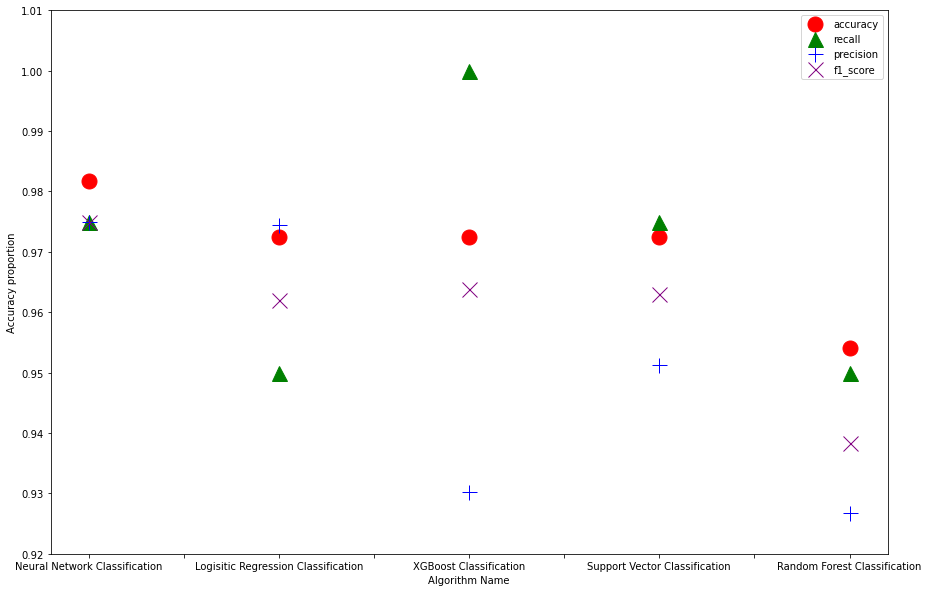

In [165]:
styles=['o','^','+','x']
results_df.plot(x='name',y=['accuracy','recall','precision','f1_score'],xlabel='Algorithm Name', ylabel='Accuracy proportion',\
                                     style=styles, color=Color,ylim = (0.92,1.01),markersize=15,figsize = (15,10));

All models performed well on this data with high accuracy. Neural Network, as implemented with a MultiLayerPerceptron, performed the best. This was somewhat surprising to me, since there were only 435 rows. Neural networks typically shine with large amounts of data. The Logistic Regression and XGBoost also did quite well, with an accuracy of 0.97. XGBoost had lower Precision at 0.93 but a perfect Recall. 

In summary, the research question was 'Which supervised learning algorithm most accurately classifies
Republicans and Democrats based on voting records?' The result is that while all perform well, Neural Network performed the best.